

# Project: Investigate a Dataset (patients-noshowappointments-2016)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

   ### Dataset Description 
***
>***This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.***

   * ScheduledDay : Tells us on what day the patient set up their appointment.                                                
   * Neighborhood : Indicates the location of the hospital.
   * Scholarship  : Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
   * No-show      : Be careful about the encoding of this column: it says ***No*** if the patient showed up to                                          their appointment,and ***Yes*** if they did not show up.
***

### Question(s) for Analysis

> ***Which variables could be used to predict patient attendance and  
     What are the affects of the variables on the attendance of the patient?  
         1. Does the age of patients affect show or no-show for medical appointment?
         2. Does the gender has an affect?  
         3. Does the particibation in the government scholarship a reason to (no-show) for medical appointment?\
         4. Dose the hypertension or Diabetes affect show for an appointment?  
         5. Do the handcap patients don't show for the appointment because the disability?  
         6. Which neighbourhood having highest percentage of commitment?  
         7.  Is there a relation between neighbourhood and patient attendance?  
         8. Does the SMS reminder before an appointment has an affect to the patients?***


     
>**_The answer of these questions will help us to understand wether the patient will be attend to the medical apointment 
     or not .._**
     
> **_Data Analysis will make it possible for us, Let's start ._**

     

##### Importing modules
 
* First let's import the modules that we are gonna use it

In [1]:
#  Data Frame.

import pandas as pd 
import numpy as np

#  Visualization .

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

##### Let's show some information and statistical parameters about our data .
* Load our data from the resource file .

In [2]:
# Load data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016 (1).csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Exploring the number of rows(patients)and columns(specifications)for data set
df.shape

(110527, 14)

###### This data set have 110527 rows and 14 columns

In [4]:
# Inspect of any missing data or any issues need to handel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Out comes
* ***Ther is no missing data*** 
* **Ther is columne need to change their type (ScheduledDay & AppointmentDay ) From object To datetime*** 
* **we need to rename some columne like (No-show to No_show) , (Hipertension to Hypertension)***

In [5]:
# Find null value in data.
df.isnull()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110524,False,False,False,False,False,False,False,False,False,False,False,False,False,False
110525,False,False,False,False,False,False,False,False,False,False,False,False,False,False


* ***None of the data fields have NULL values.***

In [6]:
# Find any duplicated in the data set.
df.duplicated().sum()

0

###### Ther is no duplicates in the data 

In [7]:
# find any duplicates in patient ID colum
df['PatientId'].duplicated().sum()

48228

###### Ther is patients Book an appointment more than once 

In [8]:
# Finding the number of unique value 
df['PatientId'].nunique()

62299

###### This is the aqtually number of patients 

In [9]:
# statistical values about the columns of the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* ***The mean of ages is 37 years old***    
* ***The max of ages is 115 years old*** 
* ***The min of ages is (-1) years old ( ther is amistake .This row will be removed).***  
* ***The ages from 25% to 75% ranges between 18 :55.***


### Data Cleaning

#After discussing the structure of the data and any problems that need to be
#cleaned, perform those cleaning steps in the second part of this section.

* ***Expert the row that contain incorrect value in Age column***

In [10]:
# Determine the row
row = df[df['Age']== -1]
row

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [11]:
# drop the row that contain a mistake 
df.drop(index = 99832, inplace = True)

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


 ***The Mistake Removed***

##### change the data type for  (ScheduledDay & AppointmentDay ) columns 

In [13]:
# change data type.
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

***change is done***

* ***Rename the columne that we determined.***

In [14]:
df.rename(columns = {'Hipertension':'Hypertension'}, inplace = True)

In [15]:
df.rename(columns ={'No-show':'No_show'}, inplace = True)

In [16]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


 ***Rename is done*** 

##### projection some data we didn't use.

In [17]:
# Removig the duplicat Ids if the showing statues the same and leaving the diffrent duplicate>
df.drop_duplicates(['PatientId','No_show'],inplace=True)

In [18]:
df.shape

(71816, 14)

In [19]:
# Drop columns we don't need it.
df.drop({'AppointmentID','ScheduledDay','AppointmentDay'}, axis=1, inplace=True)

In [20]:
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
   ## Exploratory Data Analysis

> 
   ### Histograme for all columns of data 

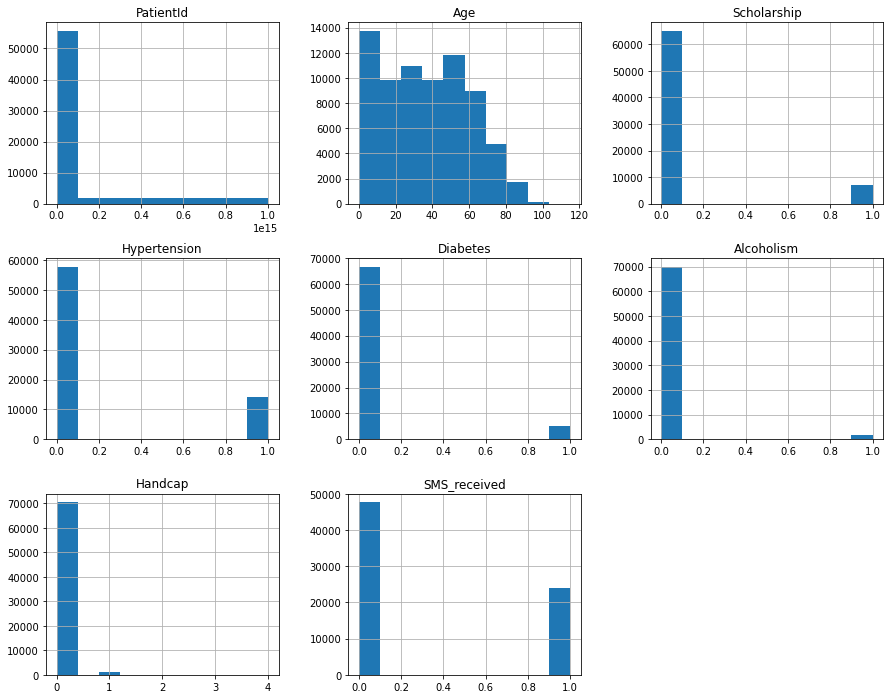

In [21]:
df.hist(figsize = (15,12));

* ***Plotting histogrames for diffrent dataset columns to fiend any possible relation betweeen them .***
* ***Age date is right skewed wich means data includes more young patients than old!***


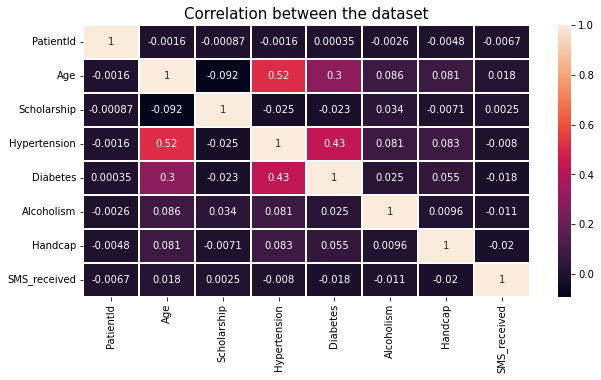

In [22]:
# plotting Correlation of values with each other
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True,linewidth=2)
plt.title('Correlation between the dataset', fontsize=15);

** ***There is no strong correlation between Show up and any other feature.\
  However, there is a strong positive correlation between Hipertension on \
  one hand and Age, and Diabetic on the other hand.***

### Research Question 1  (Does the age of patients affect show or no-show for medical appointment?!)

* ***when we see the histograme of ages we will see the Age data is right skewed wich means data includes more young patients than old!***

<AxesSubplot:>

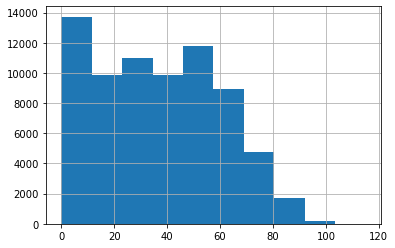

In [23]:
age=df.Age.hist();
age

* ***_Before we answer we want to remember  No in No_show  mean The patient attend the medical appointment\
    and yes in No_show mean The patient absent , to make arelation between ages and attendance_*** 

In [24]:
# Explor data (No_show , Age).
age_df =df.groupby(['No_show','Age'], as_index=False).size()
age_df

,No_show,Age,size
0,No,0,1828
1,No,1,1245
2,No,2,967
3,No,3,838
4,No,4,707
...,...,...,...
198,Yes,95,4
199,Yes,96,1
200,Yes,97,2
201,Yes,98,1


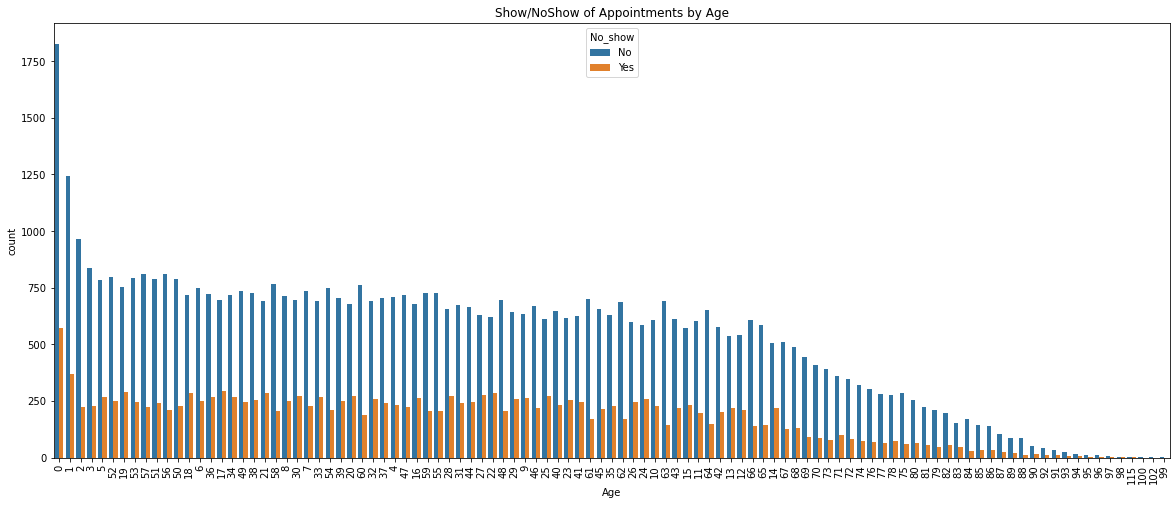

In [25]:
# plotting Show/NoShow of Appointments by Age.
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax = sns.countplot(x=df["Age"] , hue = df["No_show"] , order =df["Age"].value_counts().index)
ax.set_title("Show/NoShow of Appointments by Age");

***_From the graph we can say Ages have little effect on attendace to medical appointments_*** 

### Research Question 2  ( Does the gender has an affect?!)

* ***_To answer this question we will get the relation between gender and No_show ._***

In [26]:
# get the relation(Gender&No_show)
gender_df= df.groupby('No_show').Gender.value_counts()
gender_df

No_show  Gender
No       F         34960
         M         19193
Yes      F         11506
         M          6157
Name: Gender, dtype: int64

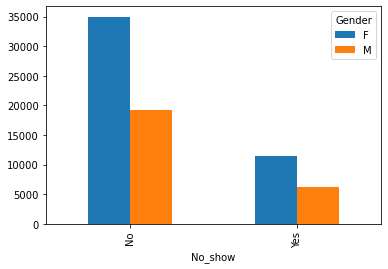

In [27]:
# plotting the relation(Gender&No_show).
gender_df.unstack().plot(kind ='bar', figsize= (6,4));

+ ***we note that  number of female patients are twice the number of male patients so\
    the attendance of females more than males but when we see the ratio of attendane\
    we finde them almost the same . The effect of Gender is low.***
    

 ### Research Question 3  (Does the particibation in the government scholarship make agreat affect to (no-show)                                                                               for medical appointment?!)

+ ***scholarship***   is the Brasilian welfare program (Bolsa Família).\
   To know if the particibation has effect on attendane to medical appointment:\
   we will:
1. get the relation between Age & scholarship.
2. get the relation between Gender & scholarship.
3. get the relation between scholarship & No_show.\
   ***_Then Answer the Question_*** 

In [28]:
# relation between Age & scholarship.
df_scholarship =df[df['Scholarship']== 1].Age.value_counts()
df_scholarship

37    171
38    170
34    163
5     163
33    159
     ... 
74      2
80      1
79      1
84      1
77      1
Name: Age, Length: 84, dtype: int64

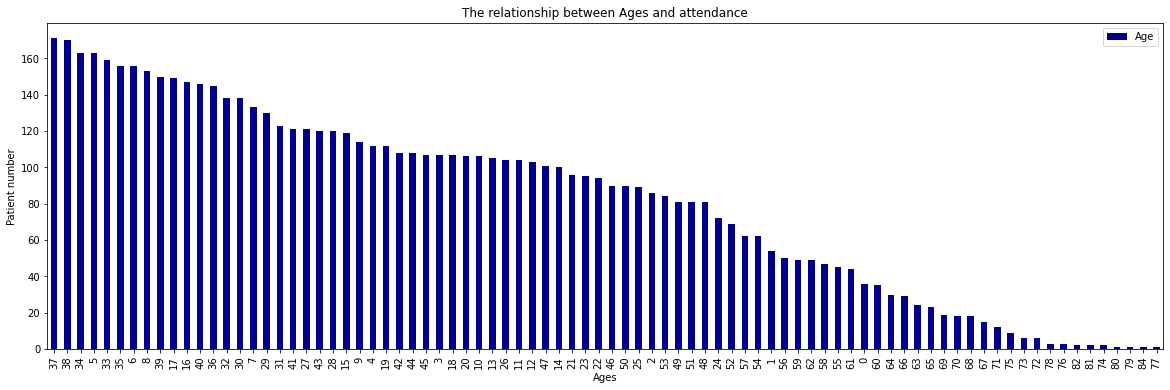

In [29]:
# plotting between Age & scholarship.
df_scholarship.plot(kind='bar', figsize=(20,6), color='darkblue');
plt.xlim=([0,120])
plt.legend()
plt.title('The relationship between Ages and attendance')
plt.xlabel('Ages')
plt.ylabel('Patient number');

+  **we find the numbers of particibaton for youth and students in welfar ptograme are greater than older and children** . 

In [30]:
# The relation between scholarship and gender.
scholership_gender = df.groupby("Scholarship").Gender.value_counts()
scholership_gender

Scholarship  Gender
0            F         40862
             M         24093
1            F          5604
             M          1257
Name: Gender, dtype: int64

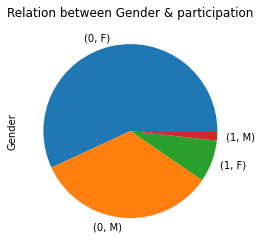

In [31]:
# plotting between scholarship and gender.
scholership_gender.plot(kind='pie',title = 'Relation between Gender & participation');

+ **This figure indicate the gender (Femal& Male) participation and not particibation in welfar program**.

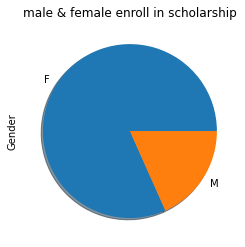

In [32]:
# plotting between scholarship (enroll) and gender.
scholership_gender.loc[1].plot(kind='pie', title= 'male & female enroll in scholarship',shadow=True);

+ **This figure indicate the gender (Femal& Male) participation only in welfar program**. 
+ **This indicate the number of femal participate greater than the number of male** .

In [33]:
# relation between scholarship & No_show.
scholarship_noshow=df.groupby(['No_show','Scholarship'], as_index=False).size()
scholarship_noshow


,No_show,Scholarship,size
0,No,0,49207
1,No,1,4946
2,Yes,0,15748
3,Yes,1,1915


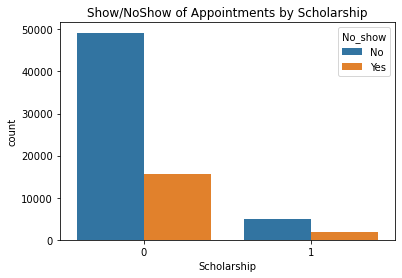

In [34]:
# plotting between scholarship & No_show.
ax=sns.countplot(x=df["Scholarship"] , hue = df["No_show"] , order =df["Scholarship"].value_counts().index);
ax.set_title("Show/NoShow of Appointments by Scholarship");


+ ***_we see participation in Brasilian welfare program has a small effect in attendance of patients\
  because the majority of attendence does not participate in welfare program so it isn't effect_***

### Research Question 4  ( Dose the hypertension or Diabetes affect show for an appointment?!)

+ ***To answer to this question we need to change the data type of colums ['Hypertension','Diabetes','Alcoholism','Handcap'] to str*** 

In [35]:
df[['Hypertension','Diabetes','Alcoholism','Handcap']] = df[['Hypertension','Diabetes','Alcoholism','Handcap']].astype(str)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientId      71816 non-null  float64
 1   Gender         71816 non-null  object 
 2   Age            71816 non-null  int64  
 3   Neighbourhood  71816 non-null  object 
 4   Scholarship    71816 non-null  int64  
 5   Hypertension   71816 non-null  object 
 6   Diabetes       71816 non-null  object 
 7   Alcoholism     71816 non-null  object 
 8   Handcap        71816 non-null  object 
 9   SMS_received   71816 non-null  int64  
 10  No_show        71816 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 8.6+ MB


In [37]:
# Explor data.
diseases_age_df = df.groupby(['Hypertension','Diabetes']).Age.mean()
diseases_age_df

Hypertension  Diabetes
0             0           30.220504
              1           52.660475
1             0           59.924914
              1           63.576448
Name: Age, dtype: float64

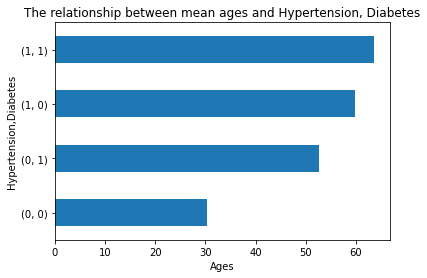

In [38]:
# plotting between mean ages and Hypertension, Diabetes.
diseases_age_df.plot(kind='barh')
plt.title('The relationship between mean ages and Hypertension, Diabetes')
plt.xlabel('Ages');

+ *This figure indicate the relation between mean ages and (Hypertension, Diabetes).*
+ *The peopel strart have Hypertension or Diabetes or both when the mean ages >= 52 .* 

In [39]:
# Explor the attendance.
deseases_df=df.groupby(['Hypertension','Diabetes']).No_show.value_counts()
deseases_df

Hypertension  Diabetes  No_show
0             0         No         42433
                        Yes        14405
              1         No           730
                        Yes          239
1             0         No          7774
                        Yes         2108
              1         No          3216
                        Yes          911
Name: No_show, dtype: int64

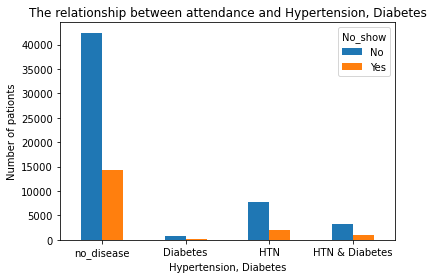

In [40]:
# plotting The relationship between attendance and Hypertension, Diabetes.
deseases_df.unstack().plot(kind='bar')
labels = ['no_disease', 'Diabetes', 'HTN','HTN & Diabetes']
plt.xticks((0,1,2,3),labels, rotation=0);
plt.title('The relationship between attendance and Hypertension, Diabetes')
plt.xlabel('Hypertension, Diabetes')
plt.ylabel('Number of pationts');

+ ***we find that the Hypertension and Diabetes have small effect on the attendance of the pationts.*** 

### Research Question 5  (Do the handcap patients don't show for the appointment because the disability?!)

In [41]:
# Exploring attendance for Handcap

handcap_df=df.groupby(['No_show','Handcap'], as_index=False).size()
handcap_df

,No_show,Handcap,size
0,No,0,53126
1,No,1,931
2,No,2,89
3,No,3,5
4,No,4,2
5,Yes,0,17385
6,Yes,1,247
7,Yes,2,27
8,Yes,3,3
9,Yes,4,1


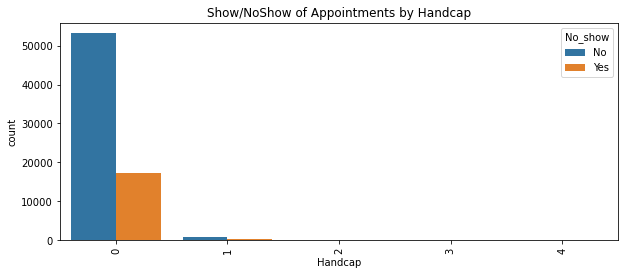

In [42]:
# plotting Show/NoShow of Appointments by Handcap.
plt.figure(figsize=(10,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df["Handcap"] , hue = df["No_show"] , order =df["Handcap"].value_counts().index)
ax.set_title("Show/NoShow of Appointments by Handcap");


+  ***Disability dosenot affect on the showing status of the patients.***
+  ***Almost attendace to medical appointment haven't disability.***
+  ***The handcap data illogical.***

### Research Question 6  ( Which neighbourhood having highest percentage of commitment?!)

+ *we get the describtion of Neighbourhood*

In [43]:
df_describe= df['Neighbourhood'].describe()
df_describe

count              71816
unique                81
top       JARDIM CAMBURI
freq                4800
Name: Neighbourhood, dtype: object

***_The decribe of neighbourhood indicate :_***
+ we have 81 neighbourhood 
+ The top is JARDIM CAMBURI


### Research Question 7  ( Is there a relation between neighbourhood and patient attendance?!)

In [44]:
 #Exploring attendance for each neighbourhood
neighborhood_df=df.groupby(['No_show','Neighbourhood'], as_index=False).size()
neighborhood_df

,No_show,Neighbourhood,size
0,No,AEROPORTO,6
1,No,ANDORINHAS,997
2,No,ANTÔNIO HONÓRIO,155
3,No,ARIOVALDO FAVALESSA,152
4,No,BARRO VERMELHO,189
...,...,...,...
155,Yes,SÃO JOSÉ,293
156,Yes,SÃO PEDRO,407
157,Yes,TABUAZEIRO,465
158,Yes,UNIVERSITÁRIO,24


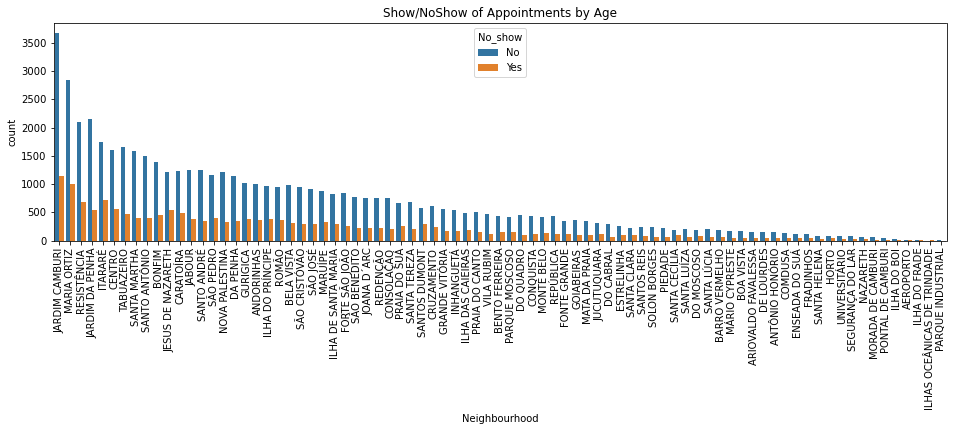

In [45]:
# plotting Show/NoShow of Appointments by Age.
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df["Neighbourhood"] , hue = df["No_show"] , order =df["Neighbourhood"].value_counts().index)
ax.set_title("Show/NoShow of Appointments by Age");


+ *Total appointment of each neighbourhood differs to other but proportion of attendance ceams equal.*
***so there is no effect on attendance from neighbourhood***

### Research Question 8  (Does the SMS reminder before an appointment has an affect to the patients?!)

In [46]:
# relation between Gender(female) and SMS_received
sms_df= (df.query('Gender == "F"').SMS_received.value_counts()/ df.SMS_received.count())*100
sms_df

0    42.180016
1    22.521444
Name: SMS_received, dtype: float64

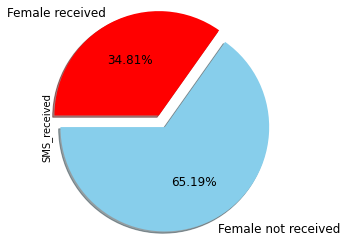

In [47]:
# plotting between Gender(female) and SMS_received.
label_names = ['Female not received ', "Female received"]

explode = [0, 0.15] # to explode the part that male did not show up

colors = ['skyblue', 'r']

sms_df.plot(kind='pie', radius=1.2, shadow=True ,labels = label_names, explode=explode,colors=colors, startangle=180,
        autopct='%0.2f%%', fontsize= 12);

+ we find that the number of femal who received SMS smaler than who didn't receive

In [48]:
# relation between Gender(male) and SMS_received.
sms_male_df = (df.query('Gender == "M"').SMS_received.value_counts()/ df.SMS_received.count())*100
sms_male_df

0    24.263395
1    11.035145
Name: SMS_received, dtype: float64

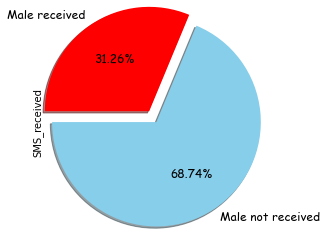

In [49]:
# plotting between Gender(male) and SMS_received.
label_names = ['Male not received ', "Male received"]

explode = [0, 0.15] # to explode the part that male did not show up

colors = ['skyblue', 'red']

sms_male_df.plot(kind='pie', radius=1.2, shadow=True ,labels = label_names, explode=explode,colors=colors, startangle=180,
        autopct='%0.2f%%',textprops = {"fontsize":12,"fontname":"Comic Sans MS" });

+ we find that the number of Male who received SMS smaler than who didn't receive.
***In all*** 
+ we can say the percentage of femal who received SMS greater than males.  
+ The percentage of didn't receive still hight in both .  
***_we want to know if receving or not receiveing affect on commitment of the pationts that will indicate in the next step_***


* ***_Before we answer we want to defien (show) = No mean The patient attend the medical appointment\
    and (noshow) = yes mean The patient absent , to make arelation between SMS_received and attendance_*** 

In [50]:
show =df.No_show == "No"
noshow = df.No_show == "Yes"

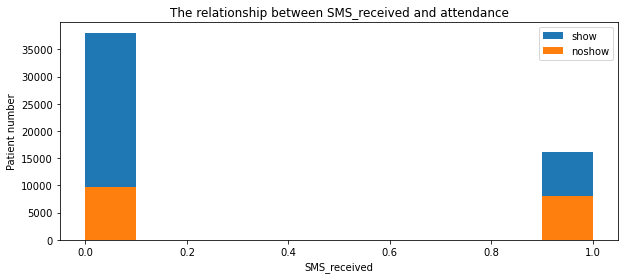

In [51]:
#plotting between SMS_received and attendance.
def attendance(df,colum_name,attending,absent):
    plt.figure(figsize=[10,4])
    df[colum_name][show].plot.hist(label = 'show')
    df[colum_name][noshow].plot.hist(label = 'noshow')
    plt.legend();
    plt.title('The relationship between SMS_received and attendance')
    plt.xlabel('SMS_received')
    plt.ylabel('Patient number')
    
attendance(df,'SMS_received',show,noshow)

+ The figure show the attendace of pationts who didn't receive SMS more from the other who receive sms 
***_so there is no effect on attendane however received SMS or not._*** 

<a id='conclusions'></a>
## Conclusions
***
> ***_In this analysis we want to know the variables that affect on attendance of patients .\
The Variables are ( Age , Gender,Scholarshipe,Hypertention & Diabetes ,Handcap , Neighborhood, SMS received).
we find the following :_***

+ we could see that people calls more to schedule an appointment that make aduplicates in data and make it huge\
  so we needed to droped its.
+ The patients are 37 years on average. 25% of patients are below 18 and most of them are below 55.
+ The Age and The Gender have a littel effect on attendance of patients appointments.
+ patients who don't participate in welfare programe are more than patients who participate.
+ participation in scholarship has all ages (children - youth - old ) but their percentage different.
+ Sholarship dose not affect attendance.
+ Neighbourhood dosen't affect showing up.
+ (JARDIM-CAMBURI) is the most frequant place.
+  Diabetes , Hypertension each one of them (individually) will not affect the no-show number.
+ Non Handcap patients are more committed.
+ Handcap doesn't affect the attendance.
+ There are a higher percentage of patients attendance who didn't receive a SMS .
+ sms received dose not affect attendance patient.
***

## Limitations:

***
  + we don't see the strong relations between factors that may make analysis not clear and 
     did not answer the main question of this analysis.
  + Distance between the hospital and destination, education level would be helpful for better analysis.

***